In [165]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj1b.ok')

Assignment: proj1b
OK, version v1.13.11



# Project 1 Part B

## Due Date: Monday, Feb 24th, 11:59PM

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** below.



**Collaborators**: *list  collaborators here*

## Scoring Breakdown

|Question|Points|
|---|---|
|1a|1|
|1b|2|
|1ci|3|
|1cii|1|
|2a|2|
|2b|1|
|2ci|4|
|2cii|2|
|2d|2|
|2e|1|
|2f|1|
|2g|3|
|3a|3|
|3b|4|
|3c|1|
|3d|2|
|4 |5|
|**Total**|38|


First we import the relevant libraries for this project.

In [166]:
import pickle
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In the following cell, we will load the cleaned data from Part A of Project 1. Note that we will be using the relevant data files based on the staff solution.

In [167]:
ins = pickle.load(open('./data/ins.p', 'rb'))
vio = pickle.load(open('./data/vio.p', 'rb'))
ins2vio = pickle.load(open('./data/ins2vio.p', 'rb'))
bus = pickle.load(open('./data/bus.p', 'rb'))

**Note**: For all parts of this project requiring you to produce a visualization, we won't be enforcing any specific size on the plots you make, as long as they are clear (i.e. no overlaps) and follow the specifications. 

<br/><br/><br/><br/>

---

<br/><br/>

## 1: Explore Inspection Scores

In this first part we explore some of the basic inspection score values visually.

<br/><br/><br/>

---


### Question 1a
Let's look at the distribution of inspection scores. As we saw before when we called head on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Make a bar plot of the counts of the number of inspections receiving each score.

It should look like the image below. It does not need to look exactly the same (e.g., no grid), but make sure that all labels and axes are correct.

![](data/1a.png)

You might find this matplotlib.pyplot tutorial useful. Key syntax that you'll need:

```
plt.bar
plt.xlabel
plt.ylabel
plt.title
```

*Note*: If you want to use another plotting library for your plots (e.g. plotly, sns) you are welcome to use that library instead so long as it works on DataHub. If you use seaborn sns.countplot(), you may need to manually set what to display on xticks.


<!--
BEGIN QUESTION
name: q1a
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

Text(0.5, 1.0, 'Distribution of Inspection Scores')

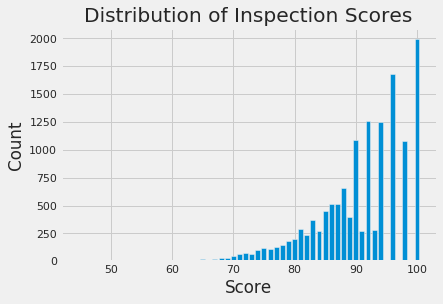

In [168]:
plt.bar(ins.score.value_counts().drop(labels=-1).index, ins.score.value_counts().drop(labels=-1).values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Inspection Scores')

<br/><br/><br/>

---

### Question 1b
Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anomalous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

<!--
BEGIN QUESTION
name: q1b
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

The most common scores are quite high, and no scores are given below 40 (barely any below 65). The scores are skewed right by quite a bit.

<br/><br/><br/>

---

### Question 1c
Let's figure out which restaurants had the worst scores ever (single lowest score). Let's start by creating a new dataframe called `ins_named`. It should be exactly the same as ins, except that it should have the name and address of every business, as determined by the bus dataframe. If a `business_id` in ins does not exist in bus, the name and address should be given as `NaN`.

**Hint**: Use the merge method to join the ins dataframe with the appropriate portion of the bus dataframe. See the official documentation on how to use merge.

**Note**: For quick reference, a pandas left join keeps the keys from the left frame, so if ins is the left frame, all the keys from ins are kept and if a set of these keys don't have matches in the other frame, the columns from the other frame for these "unmatched" key rows contains NaNs.

<!--
BEGIN QUESTION
name: q1ci
points: 3
-->

In [169]:
ins_named = ins.merge(bus.loc[:, ['bid', 'name', 'address']], how='left')
ins_named.head()

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True,AMICI'S EAST COAST PIZZERIA,475 06th St
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True,AMICI'S EAST COAST PIZZERIA,475 06th St


In [170]:
ok.grade("q1ci");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In [171]:
worst_restaurant = ins_named.loc[ins_named.loc[ins_named.score > 0].score.idxmin()]
worst_restaurant

iid                             86718_20180522
date                    05/22/2018 12:00:00 AM
score                                       45
type                     Routine - Unscheduled
bid                                      86718
timestamp        2018-05-22T00:00:00.000000000
year                                      2018
Missing Score                            False
name                                  Lollipot
address                         890 Taraval St
Name: 19077, dtype: object

**Use the cell above to identify the restaurant** with the lowest inspection scores ever. Be sure to include the name of the restaurant as part of your answer in the cell below. You can also head to yelp.com and look up the reviews page for this restaurant. Feel free to add anything interesting you want to share.

<!--
BEGIN QUESTION
name: q1cii
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

The restaurant with the lowest inspection score is called Lollipot, located on 890 Taraval Street.

<br/><br/><br/><br/>

---

<br/><br/>

## 2: Restaurant Ratings Over Time

Let's consider various scenarios involving restaurants with multiple ratings over time.


<br/><br/><br/>

---

### Question 2a

Let's see which restaurant has had the most extreme improvement in its rating, aka scores. Let the "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating. **Only consider restaurants with at least 3 ratings, aka rated for at least 3 times (3 scores)!** Using whatever technique you want to use, assign `max_swing` to the name of restaurant that has the maximum swing.

*Note*: The "swing" is of a specific business. There might be some restaurants with multiple locations; each location has its own "swing".

The city would like to know if the state of food safety has been getting better, worse, or about average. This is a pretty vague and broad question, which you should expect as part of your future job as a data scientist! However for the ease of grading for this assignment, we are going to guide you through it and offer some specific directions to consider.

<!--
BEGIN QUESTION
name: q2a
points: 2
-->

In [172]:
ins_named_no_missing = ins_named[ins_named.score != -1]
max_swing = ins_named_no_missing[ins_named_no_missing.groupby('bid')['bid'].transform('size') > 2].groupby('name')['score'].agg(np.ptp).idxmax()
max_swing

'Lollipot'

In [173]:
ok.grade("q2a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<br/><br/><br/>

---

### Question 2b

To get a sense of the number of times each restaurant has been inspected, create a multi-indexed dataframe called `inspections_by_id_and_year` where each row corresponds to data about a given business in a single year, and there is a single data column named count that represents the number of inspections for that business in that year. The first index in the MultiIndex should be on `bid`, and the second should be on year.

An example row in this dataframe might look tell you that `bid` is 573, `year` is 2017, and `count` is 4.

Hint: Use `groupby` to group based on both the `bid` and the `year`.

Hint: Use `rename` to change the name of the column to count.

<!--
BEGIN QUESTION
name: q2b
points: 1
-->

In [174]:
inspections_by_id_and_year = pd.DataFrame(ins_named.groupby(by=['bid', 'year']).size())
inspections_by_id_and_year.columns = ['count']
inspections_by_id_and_year.head()

count
bid year       
19  2017      1
    2018      1
24  2016      1
    2017      1
    2019      2

In [175]:
ok.grade("q2b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



You should see that some businesses are inspected many times in a single year. Let's get a sense of the distribution of the counts of the number of inspections by calling `value_counts`. There are quite a lot of businesses with 2 inspections in the same year, so it seems like it might be interesting to see what we can learn from such businesses.

In [176]:
inspections_by_id_and_year['count'].value_counts()

1     7211
2     4334
3     1729
4      703
5      294
6      116
7       39
8       22
9        7
10       4
14       1
13       1
12       1
11       1
17       1
Name: count, dtype: int64

<br/><br/><br/>

---


### Question 2c

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2018 for this problem, using `ins2018` data frame that will be created for you below.

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2018). This dataframe contains the field score_pair consisting of the score pairs ordered chronologically [first_score, second_score].

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1.

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary.

The first few rows of the resulting table should look something like:

|     | **score_pair** |
|-----|------------|
| **bid** |            |
| 48  | [94, 87]   |
| 66  | [98, 98]   |
| 146  | [81, 90]   |
| 184  | [90, 96]  |
| 273  | [83, 84]   |

In the cell below, create `scores_pairs_by_business` as described above.

Note: Each score pair must be a list type; numpy arrays will not pass the autograder.

Hint: Use the filter method from lecture 5 to create a new dataframe that only contains restaurants that received exactly 2 inspections.

Hint: Our code that creates the needed DataFrame is a single line of code that uses `sort_values`, `groupby`, `filter`, `groupby`, `agg`, and `rename` in that order. Your answer does not need to use these exact methods.

<!--
BEGIN QUESTION
name: q2ci
points: 4
-->

In [177]:
ins2018 = ins[(ins['year'] == 2018) & (ins['Missing Score'] == 'False')]
has_two_scores = ins2018.bid.value_counts()[ins2018.bid.value_counts() == 2].index
ins2018_two_scores = ins2018[ins2018.bid.isin(has_two_scores)].sort_values('timestamp')
scores_pairs_by_business = pd.DataFrame(ins2018_two_scores.groupby('bid')['score'].apply(list))
scores_pairs_by_business.columns = ['score_pair']
scores_pairs_by_business

,score_pair
bid,
48,"[94, 87]"
66,"[98, 98]"
146,"[81, 90]"
184,"[90, 96]"
273,"[83, 84]"
...,...
95621,"[100, 100]"
95628,"[75, 75]"
95674,"[100, 96]"


In [178]:
ok.grade("q2ci");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Now, create your scatter plot in the cell below. It does not need to look exactly the same (e.g., no grid) as the sample below, but make sure that all labels, axes and data itself are correct.

![](data/2c.png)

Key pieces of syntax you'll need:

`plt.scatter` plots a set of points. Use `facecolors='none'` and `edgecolors=b` to make circle markers with blue borders. 

`plt.plot` for the reference line.

`plt.xlabel`, `plt.ylabel`, `plt.axis`, and `plt.title`.

Note: If you want to use another plotting library for your plots (e.g. `plotly`, `sns`) you are welcome to use that library instead so long as it works on DataHub.

Hint: You may find it convenient to use the `zip()` function to unzip scores in the list.

<!--
BEGIN QUESTION
name: q2cii
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

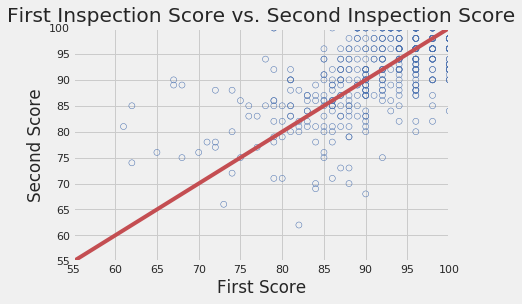

In [179]:
first_second_score = list(zip(*scores_pairs_by_business['score_pair'].values))

plt.plot(np.arange(45, 110), np.arange(45, 110), c='r')
plt.scatter(first_second_score[0], first_second_score[1], facecolors='none', edgecolors='b')
plt.axis(xmin=55, xmax=100, ymin=55, ymax=100)
plt.xlabel("First Score")
plt.ylabel("Second Score")
plt.title("First Inspection Score vs. Second Inspection Score");

<br/><br/><br/>


---


### Question 2d

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

The histogram should look like this:

![](data/2d.png)

Hint: Use `second_score` and `first_score` created in the scatter plot code above.

Hint: Convert the scores into numpy arrays to make them easier to deal with.

Hint: Use `plt.hist()` Try changing the number of bins when you call `plt.hist()`.

<!--
BEGIN QUESTION
name: q2d
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

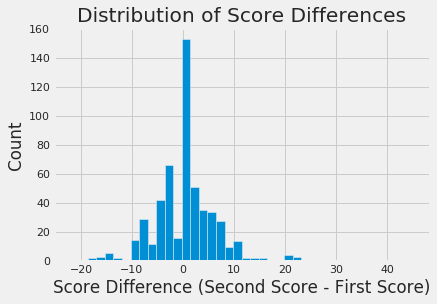

In [180]:
difference = np.subtract(first_second_score[1], first_second_score[0])
plt.hist(difference, bins=40)
plt.xlabel("Score Difference (Second Score - First Score)")
plt.ylabel("Count")
plt.title("Distribution of Score Differences");

<br/><br/><br/>


---


### Question 2e

If restaurants' scores tend to improve from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 2c? What do you oberve from the plot? Are your observations consistent with your expectations? 

Hint: What does the slope represent?

<!--
BEGIN QUESTION
name: q2e
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

If the majority of restaurants improved, I would expect the majority of scatter points to lie above the red line, which represents no change in score. The plot shows a large amount of restaurants have improved, but plenty have also gotten worse. This is consistent with my expectations, as most restaurants care about inspection scores, but many do not.

<br/><br/><br/>

---

### Question 2f

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 2d? What do you oberve from the plot? Are your observations consistent with your expectations? Explain your observations in the language of Statistics: for instance, the center, the spread, the deviation etc.

<!--
BEGIN QUESTION
name: q2f
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

This would be reflected in the histogram by data points lying to the right of the center 0, as in the second score is larger than the firs score. Based on the histogram, there are a large number of restaurants at the center - these restaurants score relatively the same in both inspections, either improving or worsening slightly. This is again consistent with expectations, as I do not expect most restaurants to change significantly in their score between inspections.

<br/><br/><br/>

---

### Question 2g 
To wrap up our analysis of the restaurant ratings over time, one final metric we will be looking at is the distribution of restaurant scores over time. Create a side-by-side boxplot that shows the distribution of these scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

The boxplot should look similar to the sample below:

![](data/2g.png)

**Hint**: Use `sns.boxplot()`. Try taking a look at the first several parameters.

**Hint**: Use `plt.figure()` to adjust the figure size of your plot.

<!--
BEGIN QUESTION
name: q2g
points: 3
manual: True
-->
<!-- EXPORT TO PDF -->

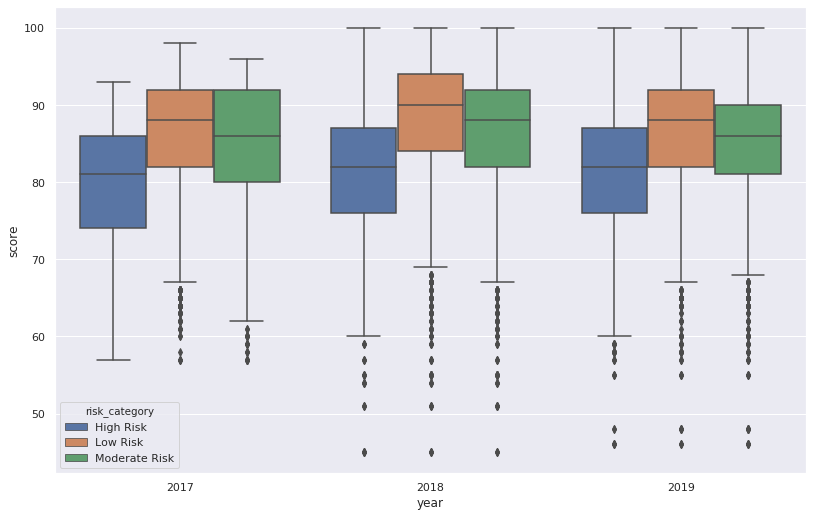

In [181]:
# Do not modify this line
sns.set()

data = ins.merge(ins2vio).merge(vio)
box_plot_data = data[(data.year.isin([2017, 2018, 2019])) & (data['Missing Score'] == 'False')]

plt.figure(figsize=(12, 8))
sns.boxplot(x=box_plot_data['year'], y=box_plot_data['score'], hue=box_plot_data['risk_category']);


<br/><br/><br/><br/>

---

<br/><br/>


## Question 3 Interpreting Visualizations ##


<br/><br/><br/>

---

### Question 3a ###

Given a set of data points `(x[i], y[i], c[i])`, a hexbin plot is a visualization of what the aggregated quantity of `c[i]` values are for each coordinate `(x[i], y[i])`.

For example, given the following toy dataset:

| **x** | **y**  | **c** |
|-------|--------|-------|
| 1 | 0  | 3 |
| 1 | 0  | 4 |
| 1 | 0  | 5 |
| 2 | 1  | 1 |
| 2 | 1  | 2 |
| 3 | -1 | 3 |

Assume the aggregate function we are using here is `np.size`, for each coordinate (x, y), we will be counting how many c values there are for that coordinate. Specifically,

- For the coordinate (x = 1, y = 0), we will have an aggregated value of 3 for c because there are three entires corresponding to (x = 1, y = 0).
- For the coordinate (x = 2, y = 1), we will have an aggregated value of 2 for c.
- For the coordinate (x = 3, y = -1) we will have an aggregated value of 1 for c.

These aggregated c values will be used to determine the intensity of the color that we assign to each hexigonal bin. It is also important to see that when the bins have the same size, counting the number of occurrences of c is equivalent to determining the density of c for each coordinate.

In the context of restaurant ratings, we can choose our `x[i]`, `y[i]`, `c[i]` values to be the longitude, latitude, and inspection score for each restaurant in San Francisco respectively. Since `x[i]` and `y[i]` also encode the geolocation of each restaurant, we can produce a geospatial hexbin plot that maps the density of scores to different locations within the city.

In order to produce the geospatial plot, we need to make sure we have all the data we need to create the plot. First, create a DataFrame `rated_geo` that includes the `longitude`, `latitude`, and `score` for each restaurant.

Hint: Note that not all the current data we have are actually valid. Some scores might be negative, and some longitude and latitudes are also invalid coordinates on Earth. Make sure to filter out those values in your resulting DataFrame.

Hint: Note that we are only concerned with the restaurant in the San Francisco region, so make sure that when you are filtering out the `latitude` and `longitude` columns, the range you provide in the flitering statement **makes sense** with the latitude and longitude of an actual location from San Francisco. **Don't worry too much about the how strict the bound needs to be**; as long as you cover all of San Francisco, you should be able to reproduce the same results we have for this question.

<!--
BEGIN QUESTION
name: q3a
points: 3
-->

In [182]:
lower_left = [37.6209, -122.5200]
upper_right = [37.8249, -122.3500]

ins_and_bus = bus.merge(ins)
ins_and_bus = ins_and_bus[(ins_and_bus['Missing Score'] == 'False') & (ins_and_bus['longitude'] >= lower_left[1]) & 
                          (ins_and_bus['longitude'] <= upper_right[1]) & (ins_and_bus['latitude'] >= lower_left[0]) & 
                          (ins_and_bus['latitude'] <= upper_right[0])]
rated_geo = ins_and_bus[['latitude', 'longitude', 'score']]
rated_geo

,latitude,longitude,score
1,37.755282,-122.420493,74
3,37.755282,-122.420493,76
5,37.755282,-122.420493,72
79,37.752158,-122.420362,85
81,37.752158,-122.420362,90
...,...,...,...
26485,37.780934,-122.399772,80
26489,37.780934,-122.399772,88
26640,37.756997,-122.420534,77
26642,37.756997,-122.420534,80


In [183]:
ok.grade("q3a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
q3a > Suite 1 > Case 3

>>> (rated_geo.shape[0] > 20000) and (rated_geo.shape[0] < 25000) == True
False

# Error: expected
#     True
# but got
#     False

Run only this test case with "python3 ok -q q3a --suite 1 --case 3"
---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 1
[ooooook....] 66.7% passed



<br/><br/><br/>

---

### Question 3b

Now that we have our DataFrame ready, we can start creating our geospatial hexbin plot.

Using the `rated_geo` DataFrame from 3a, produce a geospatial hexbin plot that shows the inspection count for all restaurant locations in San Francisco. 

Your plot should look similar to the one below:

![](data/3a.png)

Hint: Use `pd.DataFrame.plot.hexbin()` or `plt.hexbin()` to create the hexbin plot.

Hint: For the 2 functions we mentioned above, try looking at the parameter `reduce_C_function`, which determines the aggregate function for the hexbin plot.

Hint: Use `fig.colorbar()` to create the color bar to the right of the hexbin plot.

Hint: Try using a `gridsize` of 200 when creating your hexbin plot; it makes the plot cleaner.

<!--
BEGIN QUESTION
name: q3b
points: 4
manual: True
-->
<!-- EXPORT TO PDF -->

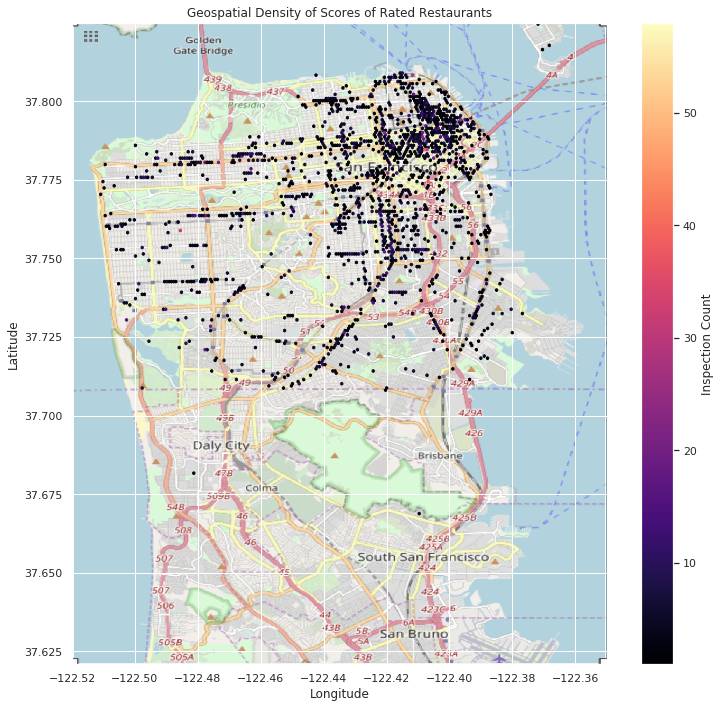

In [184]:
from matplotlib import cm
# DO NOT MODIFY THIS BLOCK
min_lon = rated_geo['longitude'].min()
max_lon = rated_geo['longitude'].max()
min_lat = rated_geo['latitude'].min()
max_lat = rated_geo['latitude'].max()
max_score = rated_geo['score'].max()
min_score = rated_geo['score'].min()
bound = ((min_lon, max_lon, min_lat, max_lat))
min_lon, max_lon, min_lat, max_lat
map_bound = ((-122.5200, -122.3500, 37.6209, 37.8249))
# DO NOT MODIFY THIS BLOCK

# Read in the base map and setting up subplot
# DO NOT MODIFY THESE LINES
basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])
# DO NOT MODIFY THESE LINES


# Create the hexbin plot
magma = cm.get_cmap('magma')
rated_geo.plot.hexbin('longitude', 'latitude', 'score', reduce_C_function=np.size, gridsize=200, cmap=magma, ax=ax)
plt.title("Geospatial Density of Scores of Rated Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
fig.get_axes()[1].set_ylabel("Inspection Count")

# Setting aspect ratio and plotting the hexbins on top of the base map layer
# DO NOT MODIFY THIS LINE
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');
# DO NOT MODIFY THIS LINE

<br/><br/><br/>

---

### Question 3c

Now that we've created our geospatial hexbin plot for the density of inspection scores for restaurants in San Francisco, let's also create another hexbin plot that visualizes the **average inspection scores** for restaurants in San Francisco.

Hint: If you set up everything correctly in 3b, you should only need to change 1 parameter here to produce the plot.

<!--
BEGIN QUESTION
name: q3c
points: 1
manual: True
-->
<!-- EXPORT TO PDF -->

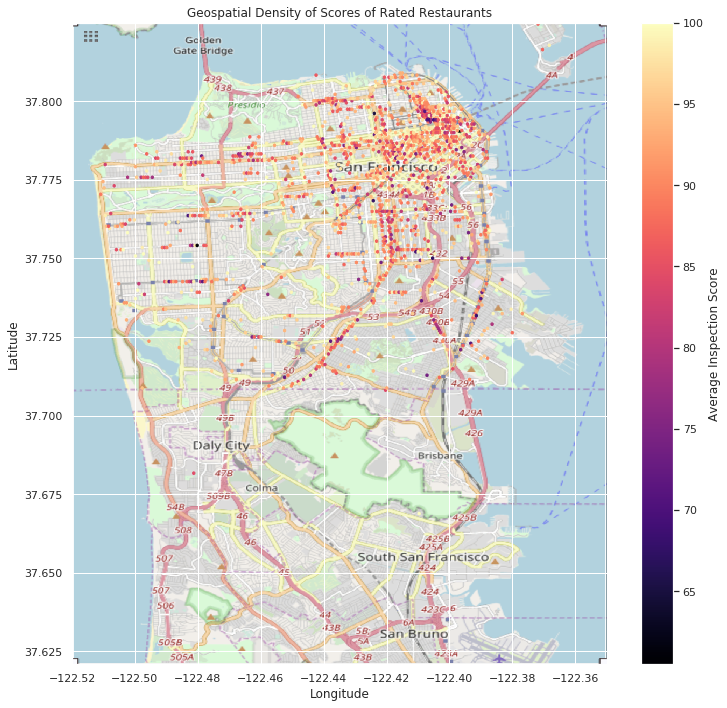

In [185]:
# Read in the base map and setting up subplot
# DO NOT MODIFY THESE LINES
basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])
# DO NOT MODIFY THESE LINES

# Create the hexbin plot
rated_geo.plot.hexbin('longitude', 'latitude', 'score', reduce_C_function=np.mean, gridsize=200, cmap=magma, ax=ax)
plt.title("Geospatial Density of Scores of Rated Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
fig.get_axes()[1].set_ylabel("Average Inspection Score")


# Setting aspect ratio and plotting the hexbins on top of the base map layer
# DO NOT MODIFY THIS LINE
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');
# DO NOT MODIFY THIS LINE

<br/><br/><br/>

---

### Question 3d

Given the 2 hexbin plots you have just created above, did you notice any connection between the first plot where we aggregate over the **inspection count** and the second plot where we aggregate over the **inspection mean**? In several sentences, comment your observations in the cell below. 

Here're some of the questions that might be interesting to address in your response:

- Roughly speaking, did you notice any of the actual locations (districts/places of interest) where inspection tends to be more frequent? What about the locations where the average inspection score tends to be low?
- Is there any connection between the locations where there are more inspections and the locations where the average inspection score is low?
- What have might led to the connections that you've identified?

<!--
BEGIN QUESTION
name: q3d
points: 2
manual: True
-->
<!-- EXPORT TO PDF -->

Inspections seem to be more frequent in more populated areas, as expected. Especially near major roads and bart lines, there appear to be the most inspections. This makes sense, as there are a high number of people, and consequently, restaurants in these areas. Low average inspection scores appear to be fairly distributed, but are more concentrated in areas with a high number of inspections.

There appears to be an inverse relation between frequency of inspections and average inspection score - areas with a high number of inspections tend to have lower average inspection scores. Chinatown, Union Square, and the Mission District, for instance, represent this trend.

This most likely occurs due to the high prevalence of cheap/fast food options in this location. Additionally, restaurants that do not score well are more likely to be inspected often. Coupled with the general lack of improvement in inspection scores, it makes sense for these areas to have both a high frequency and low average of inspection scores.

## Summary of Inspections Data

We have done a lot in this project! Below are some examples of what we have learned about the inspections data through some cool visualizations!

- We found that the records are at the inspection level and that we have inspections for multiple years.
- We also found that many restaurants have more than one inspection a year.
- By joining the business and inspection data, we identified the name of the restaurant with the worst rating and optionally the names of the restaurants with the best rating.
- We identified the restaurant that had the largest swing in rating over time.
- We also examined the change of scores over time! Many restaurants are not actually doing better.
- We created cool hexbin plots to relate the ratings with the location of restaurants! Now we know where to go if we want good food!

<br/><br/><br/><br/>

---

<br/><br/>

## Question 4 Create some more cool visualizations!

<br/>

It is your turn now! Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found in the same cell. This question will be graded leniently, but good solutions may be used to create future homework problems. 



### Grading ###

Since the assignment is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4-5 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (3-4 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (<= 2 points): No chart is created, or a chart with completely wrong results.

We will lean towards being generous with the grading. We might also either discuss in discussion or post on Piazza some examplar analysis you have done (with your permission)!

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

Please note that you will only receive support in OH and Piazza for Matplotlib and seaborn questions. However, you may use some other Python libraries to help you create you visualizations. If you do so, make sure it is compatible with the PDF export (e.g., Plotly does not create PDFs properly, which we need for Gradescope).

<!--
BEGIN QUESTION
name: q4
points: 5
manual: True
-->
<!-- EXPORT TO PDF -->

/srv/conda/envs/data100/lib/python3.6/site-packages/pandas/core/generic.py:5302: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


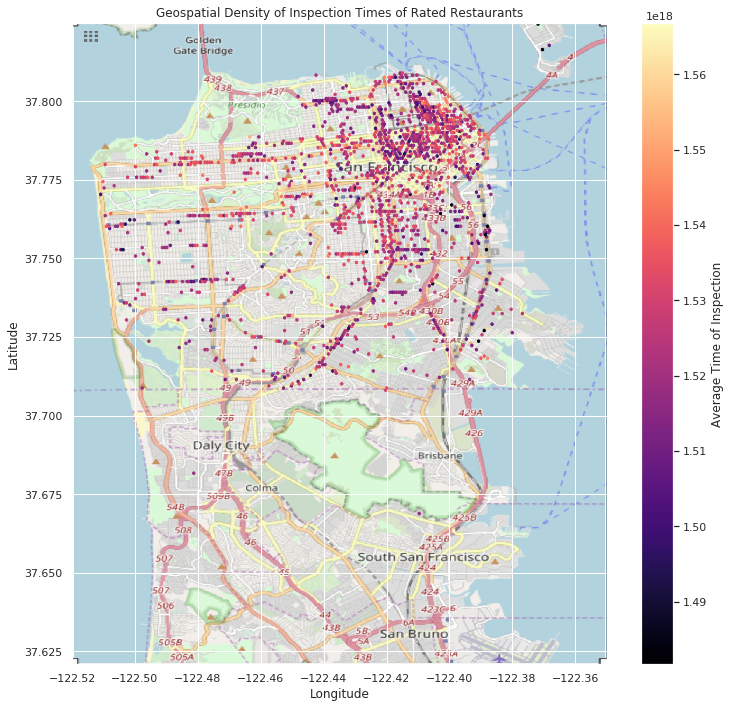

In [186]:
# YOUR DATA PROCESSING AND PLOTTING HERE
time_geo = ins_and_bus[['latitude', 'longitude', 'timestamp']]
time_geo.timestamp = time_geo.timestamp.astype(int)

basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

time_geo.plot.hexbin('longitude', 'latitude', 'timestamp', reduce_C_function=np.mean, gridsize=200, cmap=magma, ax=ax)
plt.title("Geospatial Density of Inspection Times of Rated Restaurants")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
fig.get_axes()[1].set_ylabel("Average Time of Inspection")

ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');

# YOUR EXPLANATION HERE (in a comment)
# This visualization shows the average time at which an inspection for a given restaurant happens. The colorbar is somewhat
# difficult to understand, but the top is essentially the end of 2019, and the bottom is the beginning of 2017.
# Interestingly enough, the inspections tend to have an older average - the averages appear to be in later 2017 and early
# 2018.

In [187]:
# THIS CELL AND ANY CELLS ADDED BELOW WILL NOT BE GRADED

## Congratulations! You have finished Part B of Project 1! ##

# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 12 EXPORTED QUESTIONS -->

In [188]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj1b.ipynb', 'proj1b.pdf')
ok.submit()

Generating PDF...
Saved proj1b.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj1b.ipynb'.
Submit... 100% complete
Submission successful for user: snalubola@berkeley.edu
URL: https://okpy.org/cal/data100/sp20/proj1b/submissions/Vv3jDX

